In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('/content/cleaned_f1_data_New.csv')

In [3]:
df.head()

,Season,Round,Race Name,Date,Circuit,Country,Latitude,Longitude,Driver,Driver Nationality,...,Constructor,Constructor Nationality,Grid Position,Race Position,Points Earned,Fastest Lap (s),Fastest Lap Rank,Total Pit Stops,Race Laps Completed,Retirement Status
0,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Bob Gerard,British,...,ERA,British,13,6,0.0,93.053598,-1,-1,67,Finished
1,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Cuth Harrison,British,...,ERA,British,15,7,0.0,93.053598,-1,-1,67,Finished
2,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,David Hampshire,British,...,Maserati,Italian,16,9,0.0,93.053598,-1,-1,64,Finished
3,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Brian Shawe Taylor,British,...,Maserati,Italian,20,10,0.0,93.053598,-1,-1,64,Finished
4,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Joe Fry,British,...,Maserati,Italian,20,10,0.0,93.053598,-1,-1,64,Finished


In [4]:
to_drop = ['Driver Championship Points','Latitude', 'Longitude','Driver Experience (Years)', 'Driver Fastest Lap Time', 'Driver Fastest Lap Rank', 'Points Earned', 'Fastest Lap (s)', 'Fastest Lap Rank', 'Total Pit Stops','Date','Country','Driver Nationality','Round','Season','Driver']
df = df.drop(columns=to_drop, errors='ignore')
df.columns

Index(['Race Name', 'Circuit', 'Driver Age', 'Constructor',
       'Constructor Nationality', 'Grid Position', 'Race Position',
       'Race Laps Completed', 'Retirement Status'],
      dtype='object')

In [5]:
df.to_csv('Before_Encoding_f1_data.csv', index=False)

In [6]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Race Name', 'Circuit', 'Constructor', 'Constructor Nationality',
       'Retirement Status'],
      dtype='object')


In [7]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['Driver Age', 'Grid Position', 'Race Position', 'Race Laps Completed'], dtype='object')


Categorical Values

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)

categories_list = [df[col].unique().tolist() for col in categorical_cols]

encoder = OrdinalEncoder(categories=categories_list)
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

print(df.head())

Categorical Columns: ['Race Name', 'Circuit', 'Constructor', 'Constructor Nationality', 'Retirement Status']
   Race Name  Circuit  Driver Age  Constructor  Constructor Nationality  \
0        0.0      0.0          36          0.0                      0.0   
1        0.0      0.0          44          0.0                      0.0   
2        0.0      0.0          33          1.0                      1.0   
3        0.0      0.0          35          1.0                      1.0   
4        0.0      0.0          35          1.0                      1.0   

   Grid Position  Race Position  Race Laps Completed  Retirement Status  
0             13              6                   67                0.0  
1             15              7                   67                0.0  
2             16              9                   64                0.0  
3             20             10                   64                0.0  
4             20             10                   64                0.

Numerical Values

In [9]:
df['Driver Age Binary'] = (df['Driver Age'] > 30).astype(int)
df['Race Laps Binary'] = (df['Race Laps Completed'] > 50).astype(int)
df['Grid Position Binary'] = (df['Grid Position'] <= 10).astype(int)


In [10]:
df = df.drop(['Driver Age','Race Laps Completed','Grid Position'], axis=1)

In [11]:
print(df.head())

   Race Name  Circuit  Constructor  Constructor Nationality  Race Position  \
0        0.0      0.0          0.0                      0.0              6   
1        0.0      0.0          0.0                      0.0              7   
2        0.0      0.0          1.0                      1.0              9   
3        0.0      0.0          1.0                      1.0             10   
4        0.0      0.0          1.0                      1.0             10   

   Retirement Status  Driver Age Binary  Race Laps Binary  \
0                0.0                  1                 1   
1                0.0                  1                 1   
2                0.0                  1                 1   
3                0.0                  1                 1   
4                0.0                  1                 1   

   Grid Position Binary  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


Gaussian Model

Fine Tuning

In [12]:
df['Race Position'].unique()

array([ 6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21,  8, 18, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,  4,  3,  5, 34, 35, 36,
       37])

In [13]:
def categorize_positions(df):
    # Create a new column for position category based on two groups
    df['Position_Category'] = ''

    # Apply conditions
    df.loc[df['Race Position'] < 10, 'Position_Category'] = 'Front Row'
    df.loc[df['Race Position'] >= 10, 'Position_Category'] = 'Back Row'

    return df


In [14]:
df = categorize_positions(df)

In [15]:
df['Position_Category'].value_counts()

,count
Position_Category,
Back Row,2935
Front Row,681


In [16]:
Position_Category=["Front Row", "Back Row"]
MyOrdEncoder=OrdinalEncoder(categories=[Position_Category])
df["Position_Category"]=MyOrdEncoder.fit_transform(df[["Position_Category"]])
print(df)

      Race Name  Circuit  Constructor  Constructor Nationality  Race Position  \
0           0.0      0.0          0.0                      0.0              6   
1           0.0      0.0          0.0                      0.0              7   
2           0.0      0.0          1.0                      1.0              9   
3           0.0      0.0          1.0                      1.0             10   
4           0.0      0.0          1.0                      1.0             10   
...         ...      ...          ...                      ...            ...   
3611       14.0     38.0          3.0                      3.0             20   
3612        1.0      1.0          5.0                      1.0             20   
3613       27.0     39.0        156.0                      1.0             19   
3614       27.0     39.0        154.0                      4.0             20   
3615       26.0     23.0          5.0                      1.0             20   

      Retirement Status  Dr

In [17]:
df.head()

,Race Name,Circuit,Constructor,Constructor Nationality,Race Position,Retirement Status,Driver Age Binary,Race Laps Binary,Grid Position Binary,Position_Category
0,0.0,0.0,0.0,0.0,6,0.0,1,1,0,0.0
1,0.0,0.0,0.0,0.0,7,0.0,1,1,0,0.0
2,0.0,0.0,1.0,1.0,9,0.0,1,1,0,0.0
3,0.0,0.0,1.0,1.0,10,0.0,1,1,0,1.0
4,0.0,0.0,1.0,1.0,10,0.0,1,1,0,1.0


In [18]:
df.to_csv('After_Encoding_f1_data.csv', index=False)

In [19]:
X = df.drop(['Position_Category'], axis=1)  # Drops the target column, keeps the rest as features
y = df['Position_Category']

Gaussian Model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.919889502762431
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80       140
         1.0       0.96      0.95      0.95       584

    accuracy                           0.92       724
   macro avg       0.87      0.88      0.87       724
weighted avg       0.92      0.92      0.92       724



Confusion Matrix:
 [[114  26]
 [ 32 552]]


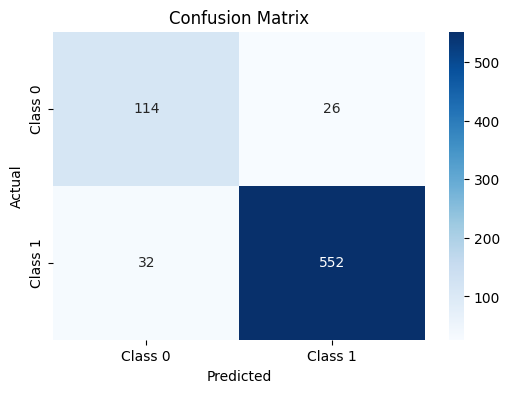

In [21]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
X = df.drop(['Position_Category'], axis=1)  # Drops the target column, keeps the rest as features
y = df['Position_Category']

Multinomial NB

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
mb_model = MultinomialNB()

# Train the model
mb_model.fit(X_train, y_train)

# Predict on test data
y_pred = mb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8107734806629834
Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.58      0.54       140
         1.0       0.90      0.87      0.88       584

    accuracy                           0.81       724
   macro avg       0.70      0.72      0.71       724
weighted avg       0.82      0.81      0.82       724



When alpha = 1

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
mb_model = MultinomialNB(alpha=1)

# Train the model
mb_model.fit(X_train, y_train)

# Predict on test data
y_pred = mb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8107734806629834
Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.58      0.54       140
         1.0       0.90      0.87      0.88       584

    accuracy                           0.81       724
   macro avg       0.70      0.72      0.71       724
weighted avg       0.82      0.81      0.82       724



Confusion Matrix:
 [[ 81  59]
 [ 78 506]]


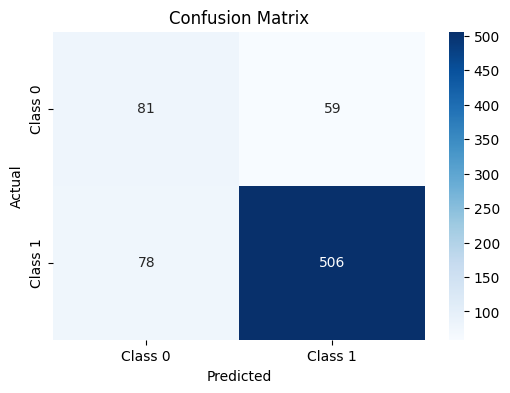

In [25]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Data Preparation only for Bernoulli

Convert even Categorical values into o's and 1's

In [26]:
categorical_columns = ['Race Name', 'Circuit', 'Constructor',
                       'Constructor Nationality', 'Retirement Status']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)
df = df.astype(int)

In [27]:
df.head()

,Race Position,Driver Age Binary,Race Laps Binary,Grid Position Binary,Position_Category,Race Name_0.0,Race Name_1.0,Race Name_2.0,Race Name_3.0,Race Name_4.0,...,Constructor Nationality_11.0,Constructor Nationality_12.0,Constructor Nationality_13.0,Constructor Nationality_14.0,Constructor Nationality_15.0,Constructor Nationality_16.0,Constructor Nationality_17.0,Constructor Nationality_18.0,Retirement Status_0.0,Retirement Status_1.0
0,6,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,7,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,10,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
print(df.head())

   Race Position  Driver Age Binary  Race Laps Binary  Grid Position Binary  \
0              6                  1                 1                     0   
1              7                  1                 1                     0   
2              9                  1                 1                     0   
3             10                  1                 1                     0   
4             10                  1                 1                     0   

   Position_Category  Race Name_0.0  Race Name_1.0  Race Name_2.0  \
0                  0              1              0              0   
1                  0              1              0              0   
2                  0              1              0              0   
3                  1              1              0              0   
4                  1              1              0              0   

   Race Name_3.0  Race Name_4.0  ...  Constructor Nationality_11.0  \
0              0              0  ...    

Bernoulli NB

In [29]:
X = df.drop(['Position_Category'], axis=1)  # Drops the target column, keeps the rest as features
y = df['Position_Category']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bernoulli Naive Bayes classifier
bnb_model = BernoulliNB()

# Train the model
bnb_model.fit(X_train, y_train)

# Predict on test data
y_pred = bnb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9171270718232044
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       140
           1       0.95      0.95      0.95       584

    accuracy                           0.92       724
   macro avg       0.87      0.87      0.87       724
weighted avg       0.92      0.92      0.92       724



When alpha = 1

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bernoulli Naive Bayes classifier
bnb_model = BernoulliNB(alpha=1)

# Train the model
bnb_model.fit(X_train, y_train)

# Predict on test data
y_pred = bnb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9171270718232044
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       140
           1       0.95      0.95      0.95       584

    accuracy                           0.92       724
   macro avg       0.87      0.87      0.87       724
weighted avg       0.92      0.92      0.92       724



Confusion Matrix:
 [[111  29]
 [ 31 553]]


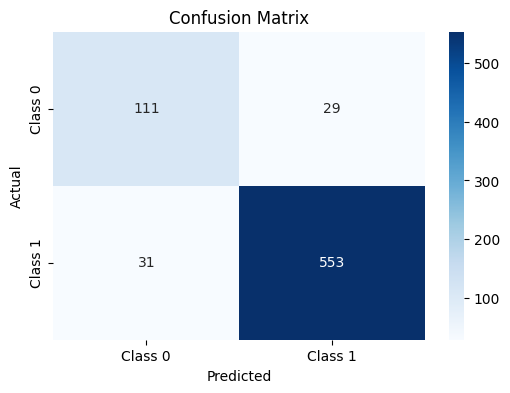

In [32]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
